# Linear Regression

Linear regression is a *linear model*, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). More specifically, that y can be calculated from a linear combination of the input variables (x).

Why are we learning linear regression?
- widely used
- runs fast
- easy to use (not a lot of tuning required)
- highly interpretable
- basis for many other methods

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('data/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


What are the **features**?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of sales units)

In [3]:
#How many points are in the dataset?
df.shape

(200, 4)

### 1. Plotting Distributions
It is good practice to check the distribution of the features.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000245A8BBA220>,
      dtype=object)

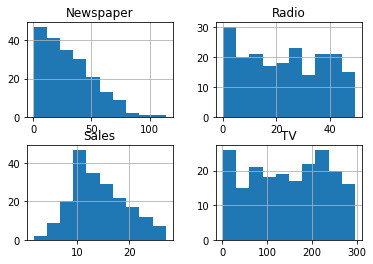

In [4]:
df.hist()

Is there a relationship between advertising type and the product sales? Scatterplots could help to visualize possible linear relationships as first pass.

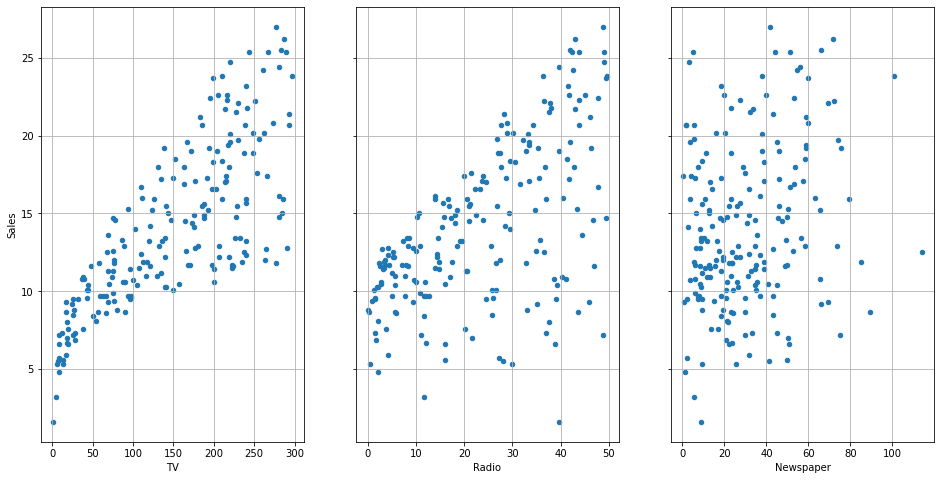

In [5]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, figsize=(16, 8), sharey=True)
df.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], grid=True)
df.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1], grid=True)
df.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2], grid=True)

### 2. Simple Linear Regression

Simple linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict Sales!

### 3. Estimating ("Learning") Model Coefficients

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):

<img src="https://raw.githubusercontent.com/justmarkham/DAT4/master/notebooks/08_estimating_coefficients.png"/>

What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?


<img src=https://raw.githubusercontent.com/justmarkham/DAT4/master/notebooks/08_slope_intercept.png>

- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)


We use sklearn's `linear_model` module to get $\beta_0$ and $\beta_1$

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(df['TV'].values.reshape(-1,1), df['Sales'].values.reshape(-1,1))

print('Model slope: %0.4f' % model.coef_[0])
print('Model intercept: %0.4f' % model.intercept_)

Model slope: 0.0475
Model intercept: 7.0326


### 4. Interpreting Model Coefficients

How do we interpret the TV coefficient ($\beta_1$)?
- A "unit" increase in TV ad spending is **associated with** a 0.0475 "unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads is **associated with** an increase in sales of 47.5 sales units.

Note that if an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

### 5. Using the Model for Prediction

Let's say that there was a new market where the TV advertising spend was **$50,000**. What would we predict for the Sales in that market?

$$y = \beta_0 + \beta_1x$$
$$y = 7.0326 + 0.0475 \times 50$$

In [7]:
# manually calculate the prediction
7.0326 + 0.0475*50

9.4076

### 6. Plotting the Least Squares Line

Let's make predictions for the **smallest and largest observed values of x**, and then use the predicted values to plot the least squares line:

In [8]:
# make predictions for min and max x and store them
x_lsl = [[df['TV'].min()],[df['TV'].max()]]
y_lsl = model.predict(x_lsl)
y_lsl

array([[ 7.0658692 ],
       [21.12245377]])

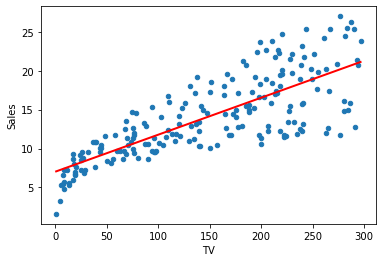

In [9]:
# first, plot the observed data
df.plot(kind='scatter', x='TV', y='Sales')

# then, plot the least squares line
plt.plot(x_lsl, y_lsl, c='red', linewidth=2)

### 7. Model fit performance

The most common way to evaluate the overall fit of a linear model is by the **R-squared** value. R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. Here's an example of what R-squared "looks like":

In [10]:
# calculate the R-squared
model.score(df['TV'].values.reshape(-1,1), df['Sales'].values.reshape(-1,1))

0.611875050850071

Is that a "good" R-squared value? It's hard to say. The threshold for a good R-squared value depends widely on the domain. Therefore, it's most useful as a tool for **comparing different models**.

To check, we could calculate for the root-mean-squared error of the model fit.

In [11]:
from sklearn.metrics import mean_squared_error
def RMSE(model, X, y):
    predicted = model.predict(X)
    rmse = (np.sqrt(mean_squared_error(y, predicted)))
    print('RMSE is {}'.format(rmse))

In [12]:
RMSE(model, df['TV'].values.reshape(-1,1), df['Sales'].values.reshape(-1,1))

RMSE is 3.2423221486546887


### 8. Visualizing Residuals and Checking for Skedasticity

An important assumption of linear regression models is that the variance of the errors, i.e. the difference of the actual to the fitted response, should be *consistent* for all observations. In other words, the variance does not change for each observation or for a range of observations. This preferred condition is known as **homoscedasticity** (same scatter). If the variance changes, we refer to that as **heteroscedasticity** (different scatter).

The easiest way to check this assumption is to create a residuals versus fitted value plot. On this type of graph, heteroscedasticity appears as a cone shape where the spread of the residuals increases in one direction. 

While heteroscedasticity does not cause bias in the coefficient estimates, it does make them less precise. 
Lower precision increases the likelihood that the coefficient estimates are further from the correct population value.
Heteroscedasticity also tends to produce p-values that are smaller than they should be. This effect occurs because heteroscedasticity increases the variance of the coefficient estimates but the least-squares procedure does not detect this increase.

Text(0, 0.5, 'residual')

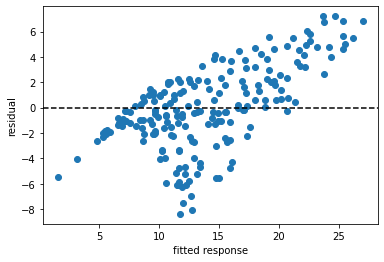

In [13]:
#compute residuals
x_actual = df['TV'].values.reshape(-1,1)
y_actual = df['Sales'].values.reshape(-1,1)
residuals = y_actual  - model.predict(x_actual)

plt.scatter(y_actual, residuals)
plt.axhline(0,color='k',ls='--')
plt.xlabel('fitted response')
plt.ylabel('residual')

In this case, the errors are heteroskedastic. This means that the model could Based on the fitted response, low sales (<10 sales units) tend to be underestimated, high sales (>20 sales units) are overestimated, and a large spread occurs in the midrange. 

The causes for heteroscedasticity vary widely by subject-area. If you detect heteroscedasticity in your model, you’ll need to use your expertise to understand why it occurs. How can we improve this?


### 9. Visualizing Residuals and Checking for Normality

When this assumption is violated, it causes problems with calculating confidence intervals and various significance tests for coefficients. 

Some of the potential reasons causing non-normal residuals:
- Presence of a few large outliers in data
- Other violations with the model assumptions
- Another model specification might be better suited for the problem

Since we are interested in making valid inferences from the model, the assumption about the normality of residuals must be satisfied.

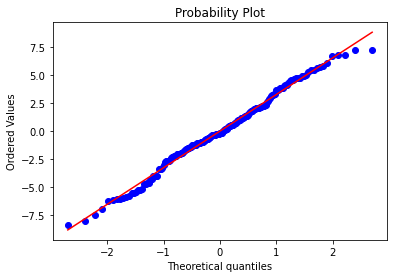

In [14]:
import scipy.stats as stats

stats.probplot(residuals[:,0], dist="norm", plot=plt)
plt.show()

### 10. Detecting Outliers
We could improve the model by removing outliers. A simple approach is done using the interquartile range (IQR = 75th percentile - 25th percentile). Outliers in this case are defined as the observations that are below (Q1 − 1.5IQR)  or above (Q3 + 1.5IQR)

In [15]:
q1 = df['Sales'].quantile(0.25)
q3 =  df['Sales'].quantile(0.75)
IQR = q3 -q1

outliers = df[(df['Sales']<(q1-1.5*IQR))&(df['Sales']>(q3+1.5*IQR))]['Sales']
outliers

Series([], Name: Sales, dtype: float64)

According to the IQR criteria, there are no outliers in the Sales data-- all values are within acceptable variance. 
Thus we accept the fit as its best possible value for now and continue with hypothesis testing. 

### 11. Hypothesis Testing and p-values

Closely related to confidence intervals is **hypothesis testing**. Generally speaking, you start with a **null hypothesis** and an **alternative hypothesis** (that is opposite the null). Then, you check whether the data supports **rejecting the null hypothesis** or **failing to reject the null hypothesis**.

(Note that "failing to reject" the null is not the same as "accepting" the null hypothesis. The alternative hypothesis may indeed be true, except that you just don't have enough data to show that.)

As it relates to model coefficients, here is the conventional hypothesis test:
- **null hypothesis:** There is no relationship between TV ads and Sales (and thus $\beta_1$ equals zero)
- **alternative hypothesis:** There is a relationship between TV ads and Sales (and thus $\beta_1$ is not equal to zero)

How do we test this hypothesis? Intuitively, we reject the null (and thus believe the alternative) if the **p-value** is near zero: usually its set to a very small number.

sklearn doesnt have a native p-value method. we use the library `statsmodels` to calculate it.

In [16]:
# print the p-values for the model coefficients
import statsmodels.formula.api as smf

# create a fitted model in one line
model_stats = smf.ols(formula='Sales ~ TV', data=df).fit()
model_stats.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

A p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response. (Again, using 0.05 as the cutoff is just a convention.)

In this case, the p-value for TV is far less than 0.05, thus points to a strong evidence of a (linear) relationship between TV ads and Sales. To be more accurate, p<0.05 means that the probability of detection of a linear trend between TV and Sales in a random set of points is less than 5%.

Note that we generally ignore the p-value for the intercept.

## Seatwork - Recitation
Let's generate linear models relating each of the remaining features "Radio" and "Newspaper" to the response "Sales".
Interpret the (a) model coefficients, (b) R-squared values, (c) RMSE and (d) plot the least squares line

Model slope: 0.2025
Model intercept: 9.3116
R-squared:  0.33203245544529525
RMSE is 4.2535159274564185


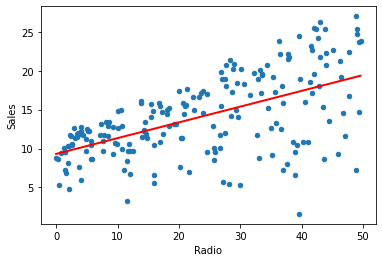

In [17]:
# code for Radio- Sales here
model = LinearRegression(fit_intercept=True)
model.fit(df['Radio'].values.reshape(-1,1), df['Sales'].values.reshape(-1,1))

print('Model slope: %0.4f' % model.coef_[0])
print('Model intercept: %0.4f' % model.intercept_)

# make predictions for min and max x and store them
x_lsl = [[df['Radio'].min()],[df['Radio'].max()]]
y_lsl = model.predict(x_lsl)
y_lsl

# first, plot the observed data
df.plot(kind='scatter', x='Radio', y='Sales')

# then, plot the least squares line
plt.plot(x_lsl, y_lsl, c='red', linewidth=2)

print("R-squared: ", model.score(df['Radio'].values.reshape(-1,1), df['Sales'].values.reshape(-1,1)))

RMSE(model, df['Radio'].values.reshape(-1,1), df['Sales'].values.reshape(-1,1))

Model slope: 0.0547
Model intercept: 12.3514
R-squared:  0.05212044544430516
RMSE is 5.066953988399707


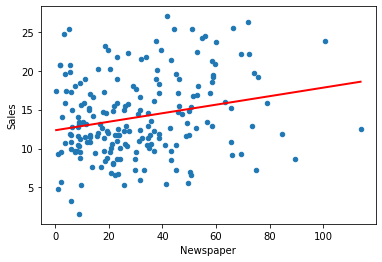

In [18]:
# code for Newspaper - Sales here
model = LinearRegression(fit_intercept=True)
model.fit(df['Newspaper'].values.reshape(-1,1), df['Sales'].values.reshape(-1,1))

print('Model slope: %0.4f' % model.coef_[0])
print('Model intercept: %0.4f' % model.intercept_)

# make predictions for min and max x and store them
x_lsl = [[df['Newspaper'].min()],[df['Newspaper'].max()]]
y_lsl = model.predict(x_lsl)
y_lsl

# first, plot the observed data
df.plot(kind='scatter', x='Newspaper', y='Sales')

# then, plot the least squares line
plt.plot(x_lsl, y_lsl, c='red', linewidth=2)

print("R-squared: ", model.score(df['Newspaper'].values.reshape(-1,1), df['Sales'].values.reshape(-1,1)))
RMSE(model, df['Newspaper'].values.reshape(-1,1), df['Sales'].values.reshape(-1,1))

## Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$


In [19]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper']
X = df[feature_cols]
y = df['Sales']

Prior fitting the model, check for multicollinearity, i.e. whether the X variables are highly correlated with each other. If multicollinearity exists between them, it may generate issues when modeling linear regressions.

In [20]:
#checking for multicollinearity
X.corr()

,TV,Radio,Newspaper
TV,1.000000,0.054809,0.056648
Radio,0.054809,1.000000,0.354104
Newspaper,0.056648,0.354104,1.000000


If there are correlation values that are >=0.8, the multicollinearity assumption is being broken. You might need to drop one of the two correlated X variables. Otherwise, you'll have difficulty interpreting your model.

- The coefficients become very sensitive to small changes in the model
- Reduced precision of the estimated coefficients

Note that, in regression analysis, interpretation of coefficients represents mean change in the Y variable for each 1 unit change in an X variable when you hold all other X variables constant. When you have multicollinearity or highly correlated X variables, it indicates that changes in one of your X variables will be associated with shifts in other X variables. The stronger the correlation, the more difficult it is to change one variable without changing another, so it becomes difficult for the model to estimate the relationship between each X variable and the Y variable independently.

In [21]:
#fit the model
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
# pair the feature names with the coefficients
print(list(zip(feature_cols, lm.coef_)))

2.9388893694594085
[('TV', 0.045764645455397615), ('Radio', 0.18853001691820448), ('Newspaper', -0.0010374930424763007)]


How do we interpret these coefficients? For a given amount of Radio and Newspaper ad spending, an **increase of $1000 in TV ad spending** is associated with an **increase in Sales of 45.765 Sales units**.

In [22]:
# calculate the R-squared
lm.score(X, y)

0.8972106381789522

In [23]:
RMSE(lm, X, y)

RMSE is 1.6685701407225697


- This model has a higher R-square (0.897) and lower RMSE(1.66) than the previous model, which means that this model provides a better fit to the data than a model that only includes TV.

## Handling Categorical Predictors with Two Categories

Up to now, all of our predictors have been numeric. What if one of our predictors was categorical?

Let's create a new feature called **Size**, and randomly assign observations to be **small or large**
This could correspond to the size of the target ad market.

In [24]:
# set a seed for reproducibility
np.random.seed(12345)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(df))
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
df['Size'] = 'S'
df.loc[mask_large, 'Size'] = 'L'
df.head()

,TV,Radio,Newspaper,Sales,Size
0,230.1,37.8,69.2,22.1,L
1,44.5,39.3,45.1,10.4,S
2,17.2,45.9,69.3,9.3,S
3,151.5,41.3,58.5,18.5,S
4,180.8,10.8,58.4,12.9,L


We can use sklearn's `OneHotEncoder` to transform the Size featrue to numerical values. But since we know this column contains 2 values, we can use a simple lambda function to map each size to a number: S->0, L->1

In [25]:
# create a new column called size
df['size'] = df['Size'].apply(lambda x:0 if x=='S' else 1)
df.head()

,TV,Radio,Newspaper,Sales,Size,size
0,230.1,37.8,69.2,22.1,L,1
1,44.5,39.3,45.1,10.4,S,0
2,17.2,45.9,69.3,9.3,S,0
3,151.5,41.3,58.5,18.5,S,0
4,180.8,10.8,58.4,12.9,L,1


Let's redo the multiple linear regression and include the **size** column:

In [26]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper','size']
X = df[feature_cols]
y = df['Sales']

lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
# pair the feature names with the coefficients
print(list(zip(feature_cols, lm.coef_)))

2.9117013282568607
[('TV', 0.045719820924362775), ('Radio', 0.18872814313427846), ('Newspaper', -0.0010976794483516517), ('size', 0.057423850854827915)]


How do we interpret the **size coefficient**? For $1000 of TV/Radio/Newspaper ad spending, being a large market is associated with an average **increase** in Sales of 57.42 sales units


-------------------------------
## Resources

- To go much more in-depth on linear regression, read Chapter 3 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/), from which this lesson was adapted. Alternatively, watch the [related videos](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/) or read my [quick reference guide](http://www.dataschool.io/applying-and-interpreting-linear-regression/) to the key points in that chapter.
- To learn more about Statsmodels and how to interpret the output, DataRobot has some decent posts on [simple linear regression](http://www.datarobot.com/blog/ordinary-least-squares-in-python/) and [multiple linear regression](http://www.datarobot.com/blog/multiple-regression-using-statsmodels/).
- This [introduction to linear regression](http://people.duke.edu/~rnau/regintro.htm) is much more detailed and mathematically thorough, and includes lots of good advice.
- This is a relatively quick post on the [assumptions of linear regression](http://pareonline.net/getvn.asp?n=2&v=8)
- Learn more about p-value misconceptions [here](https://blog.minitab.com/blog/adventures-in-statistics-2/how-to-correctly-interpret-p-values)
- Watch [this](https://www.youtube.com/watch?v=jZEKAlo1E54) to learn about the types of outliers 
- Learn more about how to detect outliers [here](https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623)